<a href="https://colab.research.google.com/github/gzsomm/Proyecto-final/blob/main/Proyecto_final_4geeks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("loveall/appliances-energy-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/loveall/appliances-energy-prediction/versions/1


In [38]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/loveall/appliances-energy-prediction/versions/1"

# Listar archivos en la carpeta
files = os.listdir(dataset_path)
print(files)

['KAG_energydata_complete.csv']


In [39]:
import pandas as pd

# Ruta del archivo (ajusta según el resultado del paso anterior)
csv_file = os.path.join(dataset_path, "KAG_energydata_complete.csv")

# Cargar el CSV en un DataFrame
df = pd.read_csv(csv_file)

# Mostrar las primeras filas
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


##**EDA**

In [40]:
columnas_esp = {
    "date": "fecha",
    "Appliances": "electrodomesticos",
    "lights": "luces",
    "T1": "t_cocina",
    "RH_1": "h_cocina",
    "T2": "t_sala",
    "RH_2": "h_sala",
    "T3": "t_hab1",
    "RH_3": "h_hab1",
    "T4": "t_hab2",
    "RH_4": "h_hab2",
    "T5": "t_baño",
    "RH_5": "h_baño",
    "T6": "t_lavadero",
    "RH_6": "h_lavadero",
    "T7": "t_estudio",
    "RH_7": "h_estudio",
    "T8": "t_closet",
    "RH_8": "h_closet",
    "T9": "t_garage",
    "RH_9": "h_garage",
    "T_out": "t_exterior",
    "Press_mm_hg": "presion_exterior",
    "RH_out": "h_exterior",
    "Windspeed": "vel_viento",
    "Visibility": "visibilidad",
    "Tdewpoint": "punto_rocio",
    "rv1": "variable_aleatoria1",
    "rv2": "variable_aleatoria2"
}

# Aplicar el cambio de nombres
df.rename(columns=columnas_esp, inplace=True)

df.index = range(1, len(df) + 1)
df.index.name = "ID"
# Mostrar las primeras filas para verificar
df.head()

,fecha,electrodomesticos,luces,t_cocina,h_cocina,t_sala,h_sala,t_hab1,h_hab1,t_hab2,...,t_garage,h_garage,t_exterior,presion_exterior,h_exterior,vel_viento,visibilidad,punto_rocio,variable_aleatoria1,variable_aleatoria2
ID,,,,,,,,,,,,,,,,,,,,,
1,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
3,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
4,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
5,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [41]:
df.info() # Listado de variables con su tipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 1 to 19735
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fecha                19735 non-null  object 
 1   electrodomesticos    19735 non-null  int64  
 2   luces                19735 non-null  int64  
 3   t_cocina             19735 non-null  float64
 4   h_cocina             19735 non-null  float64
 5   t_sala               19735 non-null  float64
 6   h_sala               19735 non-null  float64
 7   t_hab1               19735 non-null  float64
 8   h_hab1               19735 non-null  float64
 9   t_hab2               19735 non-null  float64
 10  h_hab2               19735 non-null  float64
 11  t_baño               19735 non-null  float64
 12  h_baño               19735 non-null  float64
 13  t_lavadero           19735 non-null  float64
 14  h_lavadero           19735 non-null  float64
 15  t_estudio            19735 non-null 

In [42]:
df.isna().sum() # Verificación de valores nulos

,0
fecha,0
electrodomesticos,0
luces,0
t_cocina,0
h_cocina,0
t_sala,0
h_sala,0
t_hab1,0
h_hab1,0
t_hab2,0


In [43]:
round(df.describe(),2) # Principales estadísticos de la base de datos. Al ser 29 variables, es díficil su comprensión.

,electrodomesticos,luces,t_cocina,h_cocina,t_sala,h_sala,t_hab1,h_hab1,t_hab2,h_hab2,...,t_garage,h_garage,t_exterior,presion_exterior,h_exterior,vel_viento,visibilidad,punto_rocio,variable_aleatoria1,variable_aleatoria2
count,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,...,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00
mean,97.69,3.80,21.69,40.26,20.34,40.42,22.27,39.24,20.86,39.03,...,19.49,41.55,7.41,755.52,79.75,4.04,38.33,3.76,24.99,24.99
std,102.52,7.94,1.61,3.98,2.19,4.07,2.01,3.25,2.04,4.34,...,2.01,4.15,5.32,7.40,14.90,2.45,11.79,4.19,14.50,14.50
min,10.00,0.00,16.79,27.02,16.10,20.46,17.20,28.77,15.10,27.66,...,14.89,29.17,-5.00,729.30,24.00,0.00,1.00,-6.60,0.01,0.01
25%,50.00,0.00,20.76,37.33,18.79,37.90,20.79,36.90,19.53,35.53,...,18.00,38.50,3.67,750.93,70.33,2.00,29.00,0.90,12.50,12.50
50%,60.00,0.00,21.60,39.66,20.00,40.50,22.10,38.53,20.67,38.40,...,19.39,40.90,6.92,756.10,83.67,3.67,40.00,3.43,24.90,24.90
75%,100.00,0.00,22.60,43.07,21.50,43.26,23.29,41.76,22.10,42.16,...,20.60,44.34,10.41,760.93,91.67,5.50,40.00,6.57,37.58,37.58
max,1080.00,70.00,26.26,63.36,29.86,56.03,29.24,50.16,26.20,51.09,...,24.50,53.33,26.10,772.30,100.00,14.00,66.00,15.50,50.00,50.00


In [44]:
df['fecha'] = pd.to_datetime(df['fecha'])  # Convertir a datetime si aún no lo es
print(f'Los registros son desde {df["fecha"].min().date()} a {df["fecha"].max().date()}')


Los registros son desde 2016-01-11 a 2016-05-27


In [45]:
# Eliminación de duplicados
df.drop_duplicates (subset = df.columns, keep = "first", inplace = True)
df.shape

(19735, 29)

In [46]:
# Analisis univariado
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las columnas que contienen las temperaturas
temperaturas = [col for col in df.columns if col.startswith('t_') and col != 't_exterior']
humedades = [col for col in df.columns if col.startswith('h_') and col != 'h_exterior']

# Configuramos el tamaño de la figura
print(temperaturas, humedades)

['t_cocina', 't_sala', 't_hab1', 't_hab2', 't_baño', 't_lavadero', 't_estudio', 't_closet', 't_garage'] ['h_cocina', 'h_sala', 'h_hab1', 'h_hab2', 'h_baño', 'h_lavadero', 'h_estudio', 'h_closet', 'h_garage']


In [47]:
# Verificamos que las columnas existen en el DataFrame
if temperaturas:
    # Calculamos la media de cada temperatura
    mean_temperaturas = df[temperaturas].mean()

print(mean_temperaturas)


t_cocina      21.686571
t_sala        20.341219
t_hab1        22.267611
t_hab2        20.855335
t_baño        19.592106
t_lavadero     7.910939
t_estudio     20.267106
t_closet      22.029107
t_garage      19.485828
dtype: float64


In [48]:
# Verificamos que las columnas existen en el DataFrame
if humedades:
    # Calculamos la media de cada temperatura
    mean_humedades = df[humedades].mean()

print(mean_humedades)

h_cocina      40.259739
h_sala        40.420420
h_hab1        39.242500
h_hab2        39.026904
h_baño        50.949283
h_lavadero    54.609083
h_estudio     35.388200
h_closet      42.936165
h_garage      41.552401
dtype: float64


In [49]:
# Crear un DataFrame para graficar
medias = pd.DataFrame({
        'Ubicación': mean_temperaturas.index,
        'Temperatura': mean_temperaturas.values,
        'Humedad': mean_humedades.values})

medias.describe()

,Temperatura,Humedad
count,9.000000,9.000000
mean,19.381758,42.709411
std,4.418135,6.137066
min,7.910939,35.388200
25%,19.592106,39.242500
50%,20.341219,40.420420
75%,21.686571,42.936165
max,22.267611,54.609083


In [61]:
# Creo la variable humedad promedio de cada hora en la casa

df['h_casa'] = df[['h_cocina', 'h_sala', 'h_hab1', 'h_hab2', 'h_baño', 'h_lavadero', 'h_estudio', 'h_closet', 'h_garage']].mean(axis=1)

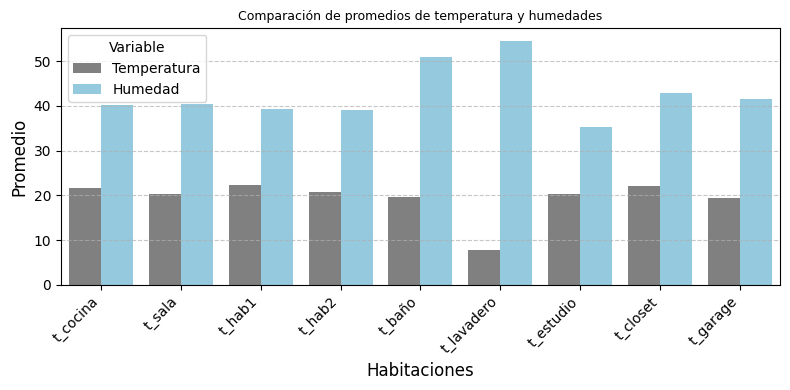

In [62]:
    # Configurar el gráfico
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(data=medias.melt(id_vars="Ubicación", var_name="Variable", value_name="Valor"),
                     x="Ubicación", y="Valor", hue="Variable", palette={"Temperatura": "grey", "Humedad": "skyblue"})

    # Personalizar el gráfico
    plt.title('Comparación de promedios de temperatura y humedades', fontsize=9)
    plt.xlabel('Habitaciones', fontsize=12)
    plt.ylabel('Promedio', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Variable")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

In [63]:
# Estadísticos de la variable objetivo: consumo de energía
round(df['h_casa'].describe(),2)

,h_casa
count,19735.00
mean,42.71
std,5.96
min,27.53
25%,38.44
50%,42.45
75%,47.32
max,59.05


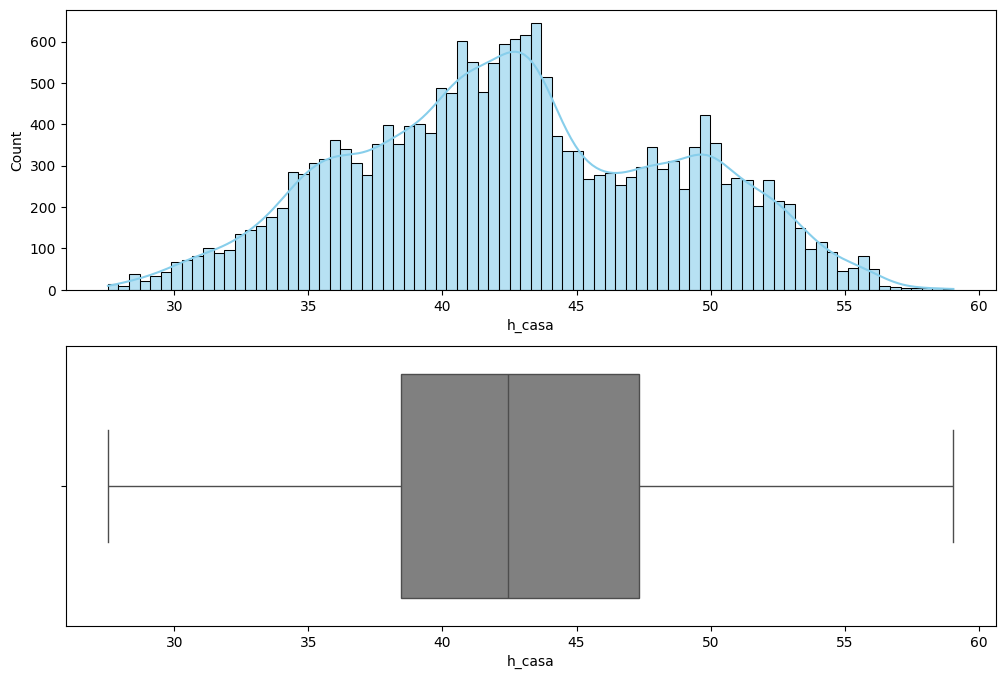

In [64]:
# Gráfico un histograma y un box plot para ver la distribución del consumo de energía en los datos
fig, axis = plt.subplots (2, 1, figsize = (12,8))

sns.histplot(ax = axis[0], data = df, x = 'h_casa', color = 'skyblue', bins = 80, kde=True, alpha = 0.6)
sns.boxplot (ax = axis[1], data = df, x = 'h_casa', color = 'grey')

plt.show()

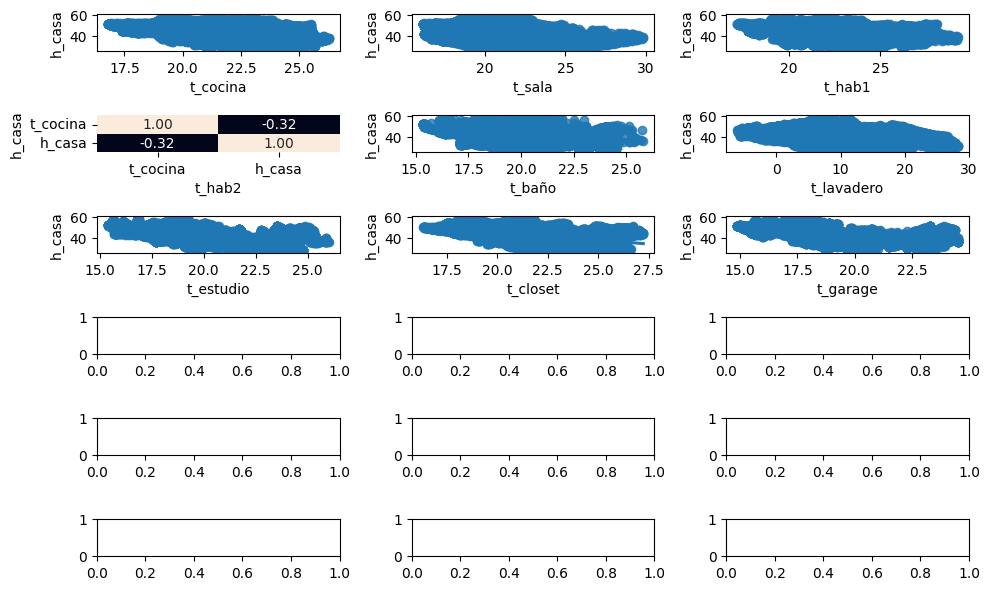

In [95]:
# Hago gráficos de relación para considerar la relación de las temperaturas de cada habitación con el consumo de energía

fig, axis = plt.subplots (6, 3, figsize = (10,6))

sns.regplot(ax = axis[0,0], data = df, x = 't_cocina', y = 'h_casa')
sns.heatmap(df[["t_cocina", "h_casa"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0,1], data = df, x = 't_sala', y = 'h_casa')
sns.regplot(ax = axis[0,2], data = df, x = 't_hab1', y = 'h_casa')
sns.regplot(ax = axis[1,0], data = df, x = 't_hab2', y = 'h_casa')
sns.regplot(ax = axis[1,1], data = df, x = 't_baño', y = 'h_casa')
sns.regplot(ax = axis[1,2], data = df, x = 't_lavadero', y = 'h_casa')
sns.regplot(ax = axis[2,0], data = df, x = 't_estudio', y = 'h_casa')
sns.regplot(ax = axis[2,1], data = df, x = 't_closet', y = 'h_casa')
sns.regplot(ax = axis[2,2], data = df, x = 't_garage', y = 'h_casa')


plt.tight_layout()
plt.show()

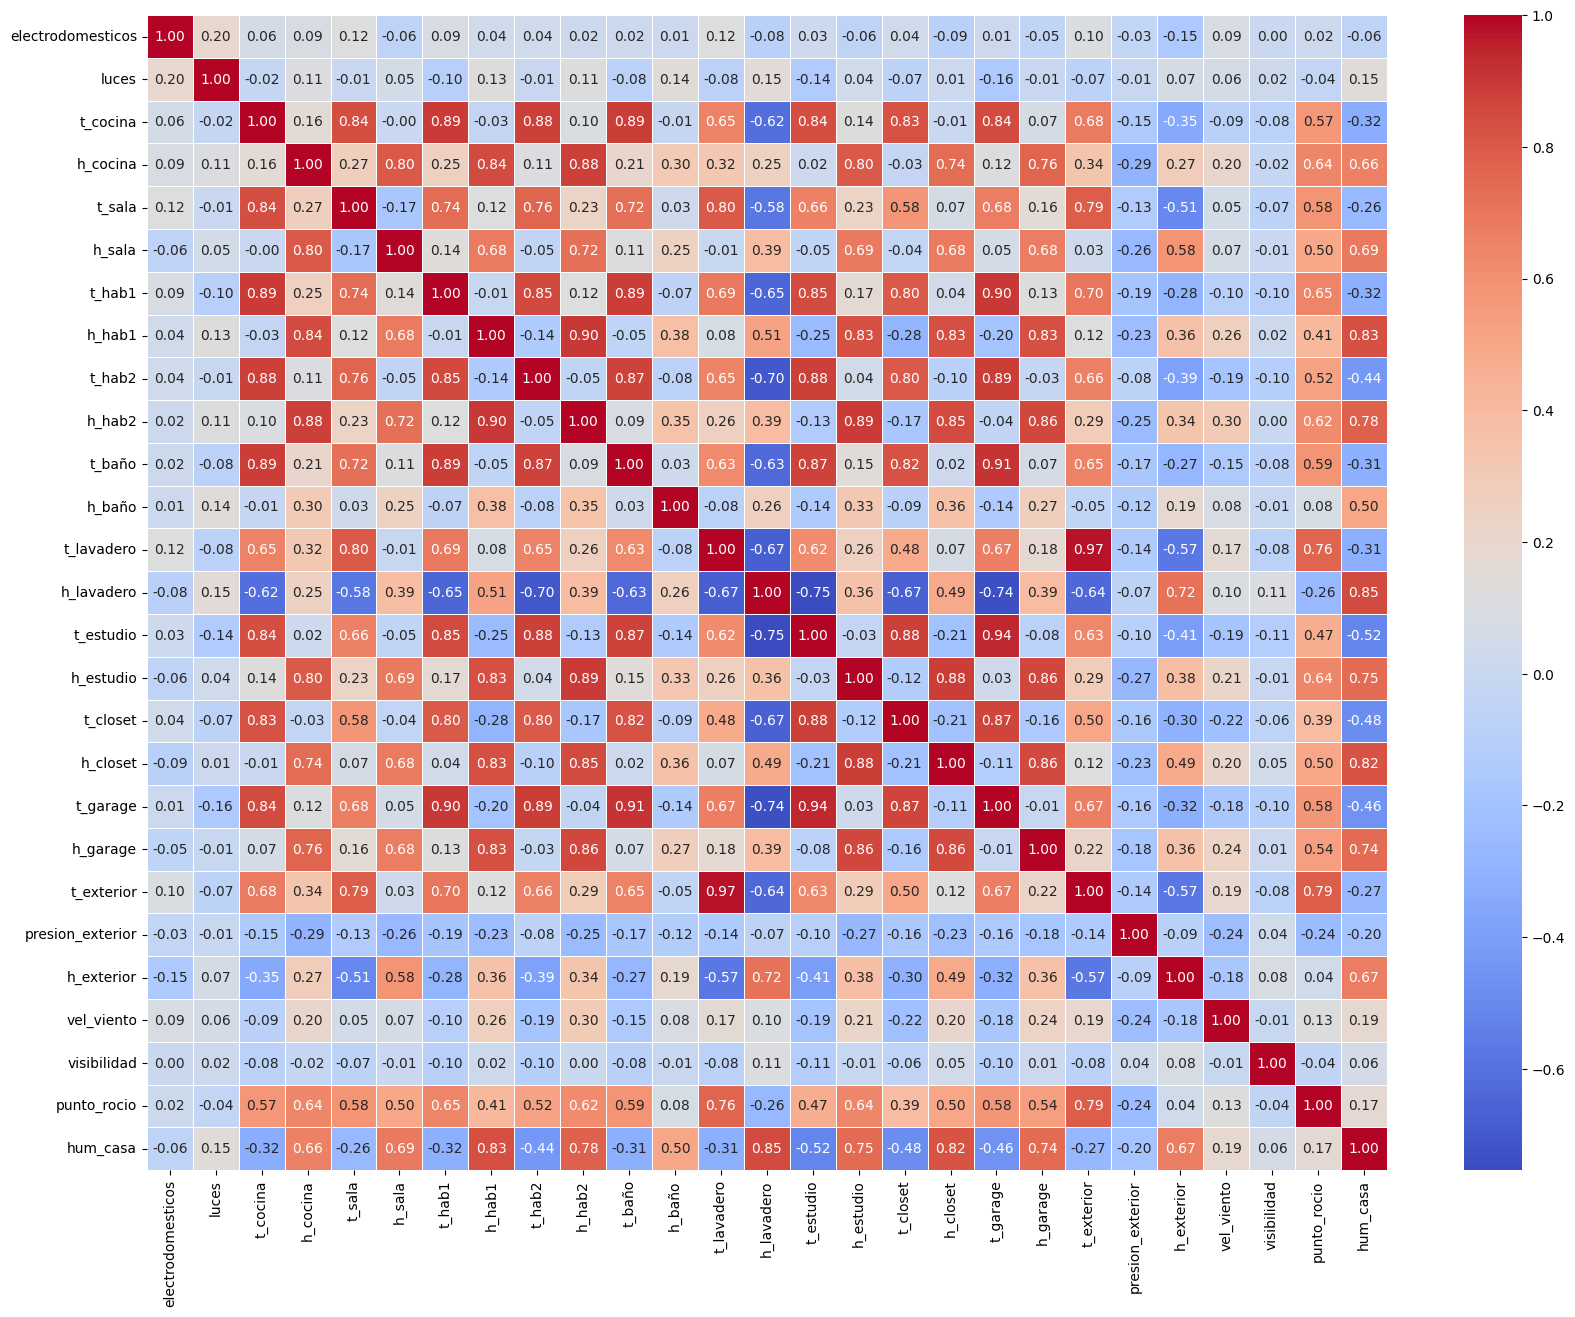

In [60]:
# Calcular la correlación sin las columnas excluidas
df_corr = df.drop(columns=['fecha', 'variable_aleatoria1', 'variable_aleatoria2']).corr()

# Crear el heatmap
plt.figure(figsize=(20
                    , 15))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.show()

In [188]:
# Calculo los promedios de temperatura y humedad de toda las habitaciones para asignarlas a la "casa"
df['h_casa'] = df[['h_cocina', 'h_sala', 'h_hab1', 'h_hab2', 'h_baño', 'h_lavadero', 'h_estudio', 'h_closet', 'h_garage']].mean(axis=1)
df['t_casa'] = df[['t_cocina', 't_sala', 't_hab1', 't_hab2', 't_baño', 't_lavadero', 't_estudio', 't_closet', 't_garage']].mean(axis=1)

t_habitaciones = ['t_cocina', 't_sala', 't_hab1', 't_hab2', 't_baño', 't_lavadero', 't_estudio', 't_closet', 't_garage']
h_habitaciones = ['h_cocina', 'h_sala', 'h_hab1', 'h_hab2', 'h_baño', 'h_lavadero', 'h_estudio', 'h_closet', 'h_garage']
col_khw = ['electrodomesticos', 'luces']

df['khw_casa'] = df[col_khw].sum(axis=1)

# Creo un nuevo dataframe con las variables de casa
df_casa = df.drop(columns=['hum_casa', 'fecha', 'variable_aleatoria1', 'variable_aleatoria2', 'habitacion_mas_humeda'] + t_habitaciones + h_habitaciones)  # Eliminar 'fecha', las variables aleatorias y las columnas de habitaciones del nuevo DataFrame
round(df_casa.head(),2)

,electrodomesticos,luces,t_exterior,presion_exterior,h_exterior,vel_viento,visibilidad,punto_rocio,h_casa,t_casa,khw_casa
ID,,,,,,,,,,,
1,60,30,6.60,733.5,92.0,7.00,63.00,5.3,50.91,17.17,90
2,60,30,6.48,733.6,92.0,6.67,59.17,5.2,50.83,17.15,90
3,50,30,6.37,733.7,92.0,6.33,55.33,5.1,50.63,17.10,80
4,50,40,6.25,733.8,92.0,6.00,51.50,5.0,50.57,17.07,90
5,60,40,6.13,733.9,92.0,5.67,47.67,4.9,50.73,17.07,100


In [189]:
df_casa.shape

(19735, 11)

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la correlación de todas las variables con "
corr = df_casa.corr()["h_casa"].abs()

# Seleccionar solo las variables con correlación alta (mayor a 0.5 por ejemplo)
corr_fuerte = corr[corr > 0.40].index
print (corr_fuerte)

Index(['h_exterior', 'h_casa', 't_casa'], dtype='object')


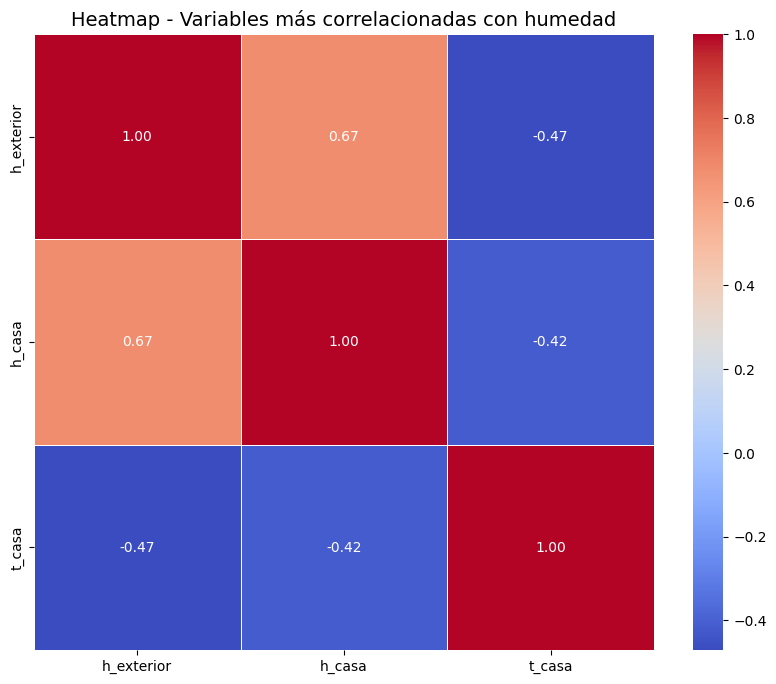

In [191]:
# Crear un heatmap solo con estas variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_fuerte].corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Título
plt.title("Heatmap - Variables más correlacionadas con humedad", fontsize=14)

# Mostrar el gráfico
plt.show()

In [192]:
df_casa.shape

(19735, 11)

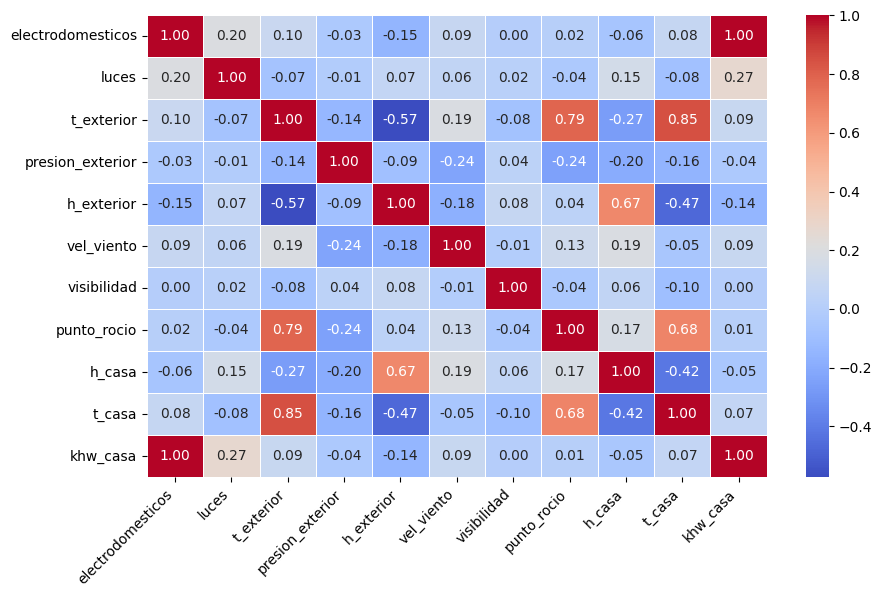

In [193]:
casa_corr = df_casa.corr()

# Creo el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(casa_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45, ha='right')


# Mostrar el gráfico
plt.show()

In [194]:
# Separación del conjunto de datos

X = df_casa.drop('h_casa', axis=1)
y = df_casa['h_casa']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [195]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15788, 10) (3947, 10) (15788,) (3947,)


Regresión lineal

In [205]:
from sklearn.linear_model import LinearRegression


model_regresion_lineal = LinearRegression()
model_regresion_lineal.fit(X_train, y_train)

LinearRegression()

In [206]:
y_pred_regresion = model_regresion_lineal.predict(X_test)
print(y_pred_regresion)

[41.51740607 45.33333553 38.73191433 ... 31.6208899  45.51807246
 36.12699531]


In [207]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_regresion)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_regresion)}")

Error cuadrático medio: 12.243765695973746
Coeficiente de determinación: 0.6598864606843506


In [208]:
# Crear y entrenar el modelo Ridge
ridge = Ridge(alpha=1, max_iter = 300)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluar el rendimiento
mse = mean_squared_error(y_test, y_pred_ridge)
cd_ridge = r2_score(y_test, y_pred_ridge)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación: {cd_ridge}")

Error cuadrático medio (MSE): 12.243766449362498
Coeficiente de determinación: 0.6598864397563353


In [200]:
import numpy as np
from sklearn.linear_model import RidgeCV

# Definir una serie de valores para alpha
alphas = np.logspace(-100, 1, 100)

# Ridge con validación cruzada
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train, y_train)

# Entrenar nuevamente con el mejor alpha
ridge_mejor = Ridge(alpha=ridge_cv.alpha_)
ridge_mejor.fit(X_train, y_train)

# Evaluar el modelo optimizado
y_pred_ridge_mejor = ridge_mejor.predict(X_test)
mse_ridge_mejor = mean_squared_error(y_test, y_pred_mejor)
cd_ridge_mejor = r2_score(y_test, y_pred_ridge_mejor)

print(f"Nuevo MSE con mejor alpha: {mse_ridge_mejor}")
print(f"Coeficiente de determinación: {cd_ride_mejor}")

Nuevo MSE con mejor alpha: 12.50915095546307
Coeficiente de determinación: 0.6525144542176802


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.43559e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [212]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo Ridge
ridge = Ridge()

# Definir el espacio de hiperparámetros
param_grid = {'alpha': [0.1, 1, 10, 100], 'max_iter': [100, 300, 1000]}

# Crear el GridSearchCV
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)

# Ajustar el modelo
grid.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(f"Mejores hyperparameters: {grid.best_params_}")

Mejores hyperparameters: {'alpha': 10, 'max_iter': 100}


In [213]:
# Entrenar nuevamente con el mejor alpha
ridge = Ridge(alpha=10, max_iter = 100)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluar el rendimiento
mse = mean_squared_error(y_test, y_pred_ridge)
cd_ridge = r2_score(y_test, y_pred_ridge)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación: {cd_ridge}")

Error cuadrático medio (MSE): 12.243766449362498
Coeficiente de determinación: 0.6598864397563353


In [201]:
from sklearn.linear_model import Lasso

# Crear y entrenar el modelo Lasso con una penalización alpha=1.0
lasso_model = Lasso(alpha=1.0, max_iter= 300)
lasso_model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
y_pred_lasso = lasso_model.predict(X_test)


In [202]:
# Evaluar el rendimiento
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
cd_lasso = r2_score(y_test, y_pred_lasso)
print(f"Error cuadrático medio (MSE): {mse_lasso}")
print(f"Coeficiente de determinación: {cd_lasso}")

Error cuadrático medio (MSE): 13.934713670222177
Coeficiente de determinación: 0.6129144494093077
